In [1]:
import yfinance as yf
import pandas as pd

# Define the ticker symbol, for example 'AAPL' for Apple Inc.
ticker_symbol = 'AAPL'

# Create a Ticker object
ticker = yf.Ticker(ticker_symbol)

# Fetch the last 1 month of 5-minute interval data and name it df_minute
df = ticker.history(period='1y', interval='1d')

# Filter out weekends
df = df[df.index.dayofweek < 5]

# Remove the time part, keeping only the date
df.index = df.index.date

df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2023-11-16,188.645824,190.029047,187.730296,188.785141,54412900,0.0,0.0
2023-11-17,189.322511,189.451882,187.650709,188.765244,50922700,0.0,0.0
2023-11-20,188.964255,190.974411,188.954309,190.516647,46505100,0.0,0.0
2023-11-21,190.476852,190.586317,188.814996,189.710602,38134500,0.0,0.0
2023-11-22,190.556450,191.989417,189.899664,190.377319,39617700,0.0,0.0


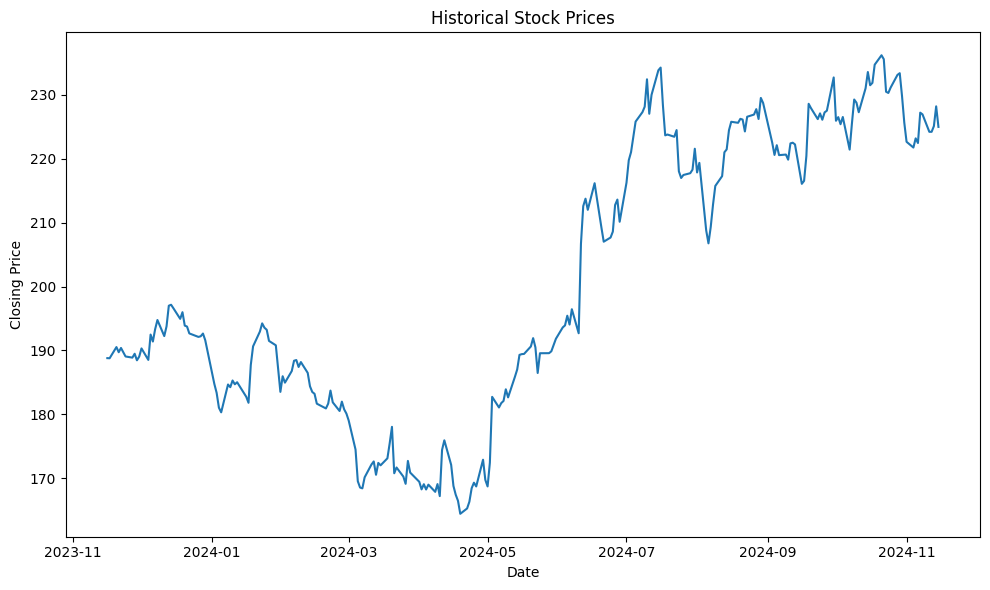

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the stock closing prices
plt.figure(figsize=(10, 6))
sns.lineplot(data=df['Close'])
plt.title('Historical Stock Prices')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.tight_layout()
plt.show()


In [4]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(df['Close'])
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# If the p-value is below 0.05, we can reject the null hypothesis of the ADF test and say that the series is stationary.



ADF Statistic: -0.7968605608271194
p-value: 0.82004251510381


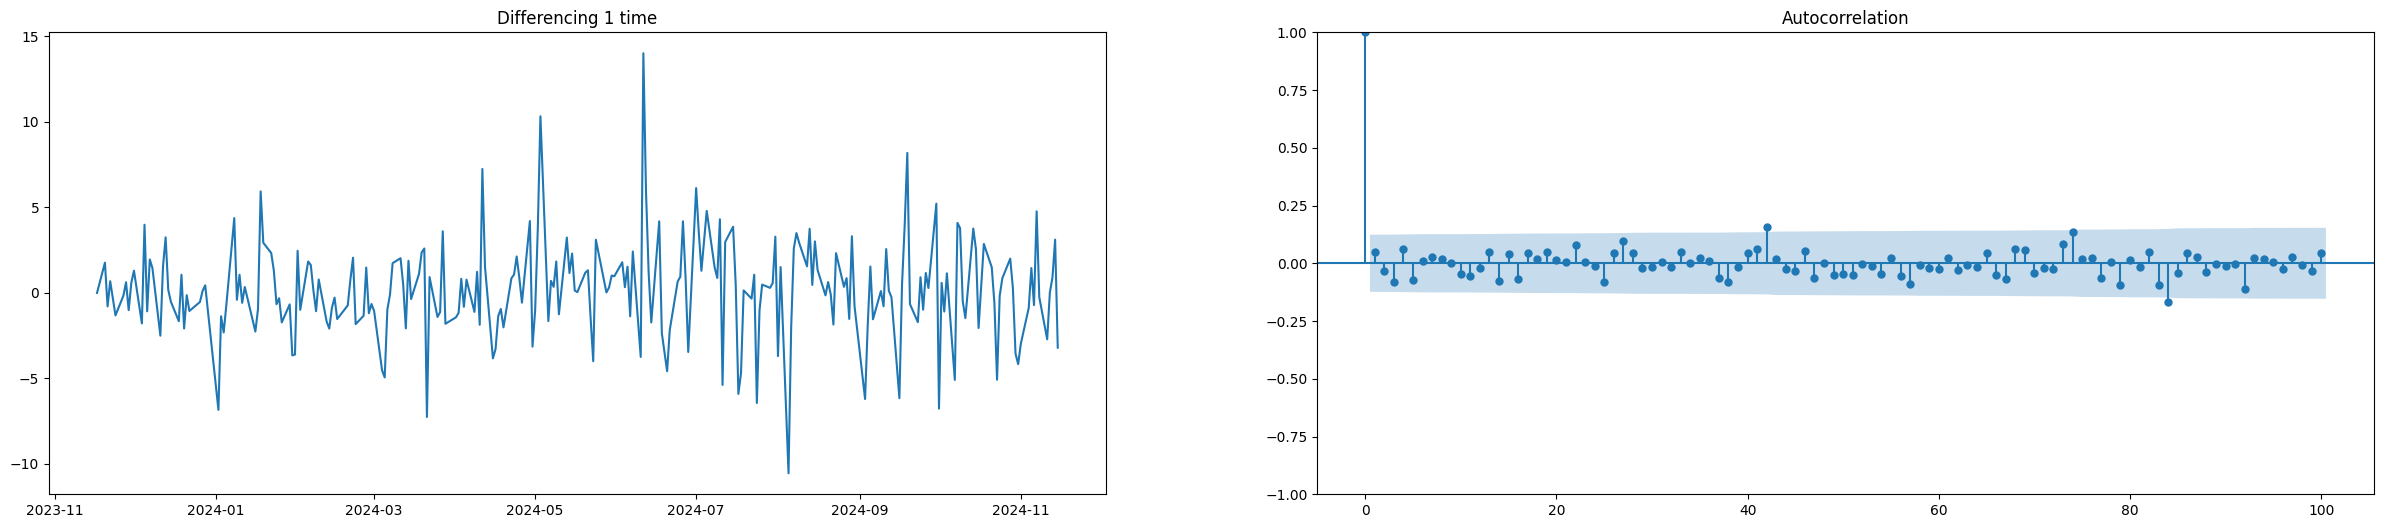

In [5]:
from statsmodels.graphics.tsaplots import plot_acf

# Differencing the time series to make it stationary
diff = df['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30, 6))

ax1.plot(diff)
ax1.set_title("Differencing 1 time")
plot_acf(diff, ax=ax2, lags=100);


In [6]:
# Re-run the ADF test on the differenced series
adf_test_diff = adfuller(diff)
print(f"ADF Statistic (Differenced Once): {adf_test_diff[0]}")
print(f"p-value (Differenced Once): {adf_test_diff[1]:.5f}")

# If the p-value is below 0.05 after differencing, we have a stationary series

ADF Statistic (Differenced Once): -14.920111392318688
p-value (Differenced Once): 0.00000


The lowest positive lag above the 95% confidence interval is lag 4.
The autocorrelation at lag 4 is 0.1442, which is 116.33% above the 95% confidence interval.


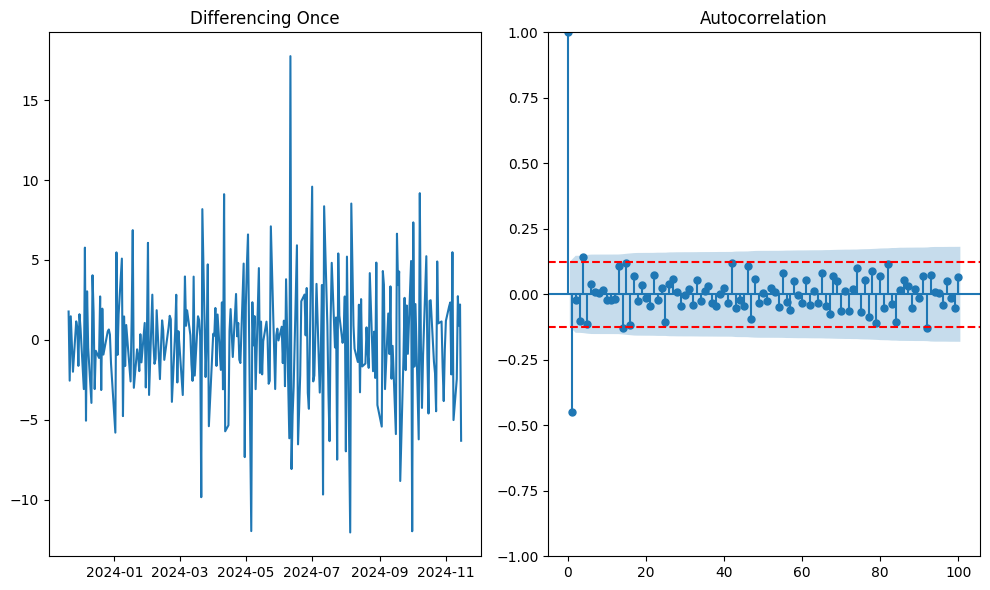

In [7]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
import numpy as np

# Assume `df['close']` is your time series data (or the differenced series)
diff = df['Close'].diff().diff().dropna()  # Differencing once

# Calculate the autocorrelation values for the first 100 lags
acf_values = acf(diff, fft=False, nlags=100)

# Calculate the 95% confidence interval for statistical significance
confidence_interval = 1.96 / np.sqrt(len(diff))  # 95% confidence interval

# Find the lowest lag where the positive autocorrelation is above the confidence interval
lowest_significant_lag = None
for i in range(1, len(acf_values)):  # Start from lag 1 to skip the zero-lag
    if acf_values[i] > confidence_interval:  # Only consider positive ACF values above CI
        lowest_significant_lag = i  # This lag is significant
        break  # Stop as soon as we find the lowest significant positive lag

# Calculate the percentage of the confidence interval for the lowest significant lag's ACF value
if lowest_significant_lag is not None:
    significant_acf_value = acf_values[lowest_significant_lag]
    percentage_above_confidence = (significant_acf_value / confidence_interval) * 100
else:
    significant_acf_value = None
    percentage_above_confidence = 0

# Create the plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# Plot differenced data
ax1.plot(diff)
ax1.set_title("Differencing Once")

# Plot the autocorrelation function with extended lags (up to 100)
plot_acf(diff, ax=ax2, lags=100)

# Add a line for the confidence interval (shaded region of significance)
ax2.axhline(y=confidence_interval, color='r', linestyle='--')
ax2.axhline(y=-confidence_interval, color='r', linestyle='--')

# Output the result: Lowest significant positive lag above the 95% confidence interval
if lowest_significant_lag is not None:
    print(f"The lowest positive lag above the 95% confidence interval is lag {lowest_significant_lag}.")
    print(f"The autocorrelation at lag {lowest_significant_lag} is {significant_acf_value:.4f}, "
          f"which is {percentage_above_confidence:.2f}% above the 95% confidence interval.")
else:
    print("No significant positive lag above the 95% confidence interval was found.")

plt.tight_layout()
plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# from statsmodels.graphics.tsaplots import plot_acf
# from statsmodels.tsa.stattools import acf
# import numpy as np

# # Assume `df['close']` is your time series data (or the differenced series)
# diff = df['Close'].diff().dropna()  # Differencing 3 times

# # Calculate the autocorrelation values for the first 100 lags
# acf_values = acf(diff, fft=False, nlags=100)

# # Calculate the 95% confidence interval for statistical significance
# confidence_interval = 1.96 / np.sqrt(len(diff))  # 95% confidence interval

# # Find the highest lag where the positive autocorrelation is above the confidence interval
# highest_significant_lag = None
# for i in range(len(acf_values)-1, -1, -1):  # Loop through lags in reverse (from highest to lowest)
#     if acf_values[i] > confidence_interval:  # Only consider positive ACF values above CI
#         highest_significant_lag = i  # This lag is significant
#         break  # We stop as soon as we find the highest significant positive lag

# # Calculate the percentage of the confidence interval for the highest significant lag's ACF value
# if highest_significant_lag is not None:
#     significant_acf_value = acf_values[highest_significant_lag]
#     percentage_above_confidence = (significant_acf_value / confidence_interval) * 100
# else:
#     significant_acf_value = None
#     percentage_above_confidence = 0

# # Create the plots
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 6))

# # Plot differenced data
# ax1.plot(diff)
# ax1.set_title("Differencing 3 times")

# # Plot the autocorrelation function with extended lags (up to 100)
# plot_acf(diff, ax=ax2, lags=50)

# # Add a line for the confidence interval (shaded region of significance)
# ax2.axhline(y=confidence_interval, color='r', linestyle='--')
# ax2.axhline(y=-confidence_interval, color='r', linestyle='--')

# # Output the result: Highest significant positive lag above the 95% confidence interval
# print(f"The highest positive lag above the 95% confidence interval is lag {highest_significant_lag}.")
# print(f"The autocorrelation at lag {highest_significant_lag} is {significant_acf_value:.4f}, "
#       f"which is {percentage_above_confidence:.2f}% above the 95% confidence interval.")

# plt.tight_layout()
# plt.show()


In [ ]:
#print(lowest_significant_lag)

In [8]:
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
model = ARIMA(df['Close'], order=(lowest_significant_lag, 2, lowest_significant_lag))  
model_fit = model.fit()


/workspaces/Final-Project-Trading-Predictor/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/Final-Project-Trading-Predictor/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/workspaces/Final-Project-Trading-Predictor/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


/workspaces/Final-Project-Trading-Predictor/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/workspaces/Final-Project-Trading-Predictor/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


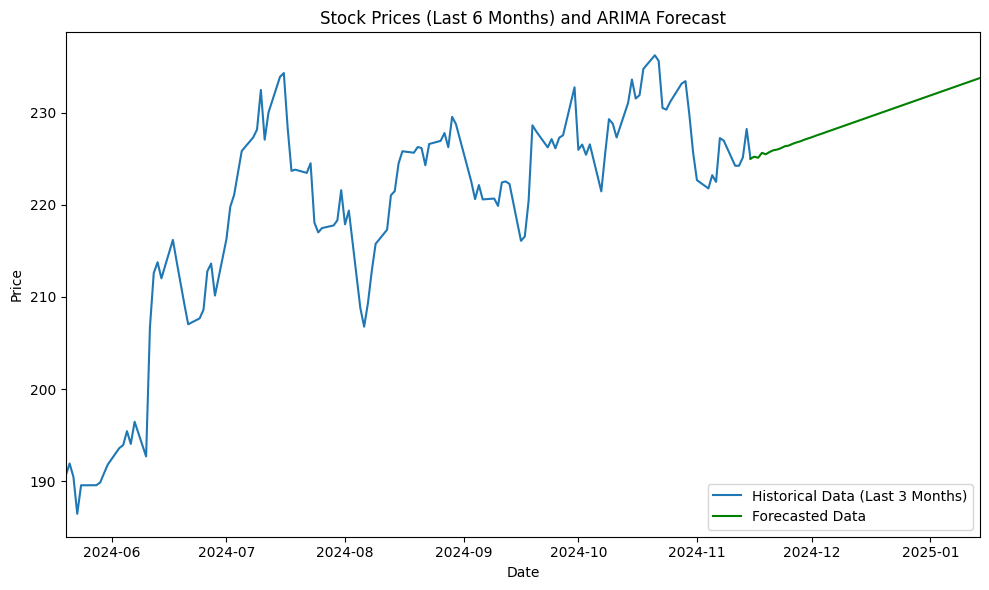

In [9]:
from datetime import datetime, timedelta
# Define the forecast steps (next 15 days, for example)
forecast_steps = 60
forecast = model_fit.forecast(steps=forecast_steps)

# Get the last date and price from the historical data
last_date = df.index[-1]  # Get the last date in the historical series
last_price = df['Close'].iloc[-1]  # Get the last close price

# Generate future dates for the forecast to start exactly after the last historical date
forecast_dates = [last_date + timedelta(days=i) for i in range(1, forecast_steps + 1)]  # Next forecast_steps days

# Create a DataFrame for the forecast with datetime objects
forecast_df = pd.DataFrame({'date': forecast_dates, 'forecast': forecast})
forecast_df.set_index('date', inplace=True)

# Include the last known value from the historical data as the first forecast point
forecast_df = pd.DataFrame({'date': [last_date] + list(forecast_dates), 
                             'forecast': [last_price] + list(forecast)})

forecast_df.set_index('date', inplace=True)

# Get the last 3 months of historical data
three_months_ago = last_date - timedelta(days=180)  # 3 months ago (approx 90 days)
df_last_3_months = df[df.index >= three_months_ago]  # Filter data to the last 3 months

# Plotting
plt.figure(figsize=(10, 6))

# Plot historical data for the last 3 months
sns.lineplot(data=df_last_3_months['Close'], label='Historical Data (Last 3 Months)')

# Plot forecast data
sns.lineplot(data=forecast_df['forecast'], label='Forecasted Data', color='green')

# Title and labels
plt.title('Stock Prices (Last 6 Months) and ARIMA Forecast')
plt.xlabel('Date')
plt.ylabel('Price')

# Set limits for the x-axis to show the last 3 months and forecast
plt.xlim([df_last_3_months.index[0], forecast_df.index[-1]])

# Display the legend and adjust layout
plt.legend()
plt.tight_layout()
plt.show()


In [10]:
df.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
2023-11-16,188.645824,190.029047,187.730296,188.785141,54412900,0.0,0.0
2023-11-17,189.322511,189.451882,187.650709,188.765244,50922700,0.0,0.0
2023-11-20,188.964255,190.974411,188.954309,190.516647,46505100,0.0,0.0
2023-11-21,190.476852,190.586317,188.814996,189.710602,38134500,0.0,0.0
2023-11-22,190.556450,191.989417,189.899664,190.377319,39617700,0.0,0.0


In [11]:
forecast_df.head()

,forecast
date,
2024-11-15,225.000000
2024-11-16,225.214987
2024-11-17,225.095566
2024-11-18,225.628142
2024-11-19,225.470989
